# 3. Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("PolynomialRegressionData.csv")

In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## 3.1 단순 선형 회귀(Simple Linear Regression)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
reg = LinearRegression()

In [6]:
reg.fit(X, y) # 전체 데이터로 학습

LinearRegression()

### 데이터 시각화(전체)

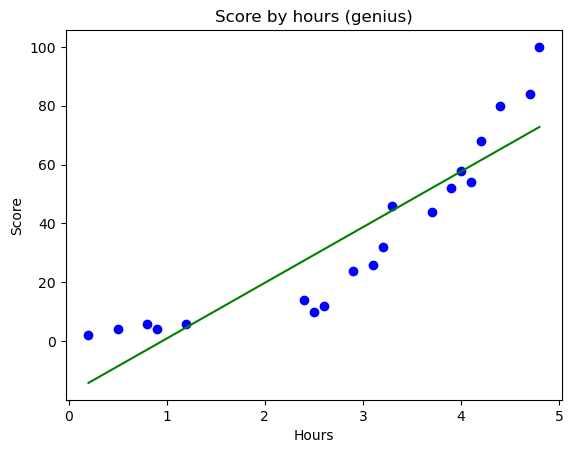

In [7]:
plt.scatter(X, y, color='blue')
plt.plot(X, reg.predict(X), color='green')
plt.title("Score by hours (genius)")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

In [8]:
reg.score(X, y)

0.8169296513411765

## 3-2. 다항 회귀 (Polynomial Regression)

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly_reg = PolynomialFeatures(degree=4) # 이차 다항식으로 회귀

In [11]:
X_poly = poly_reg.fit_transform(X)
X_poly[:5] # X를 X^0, X^1, X^2의 항으로 변환

array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
       [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
       [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
       [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]])

In [12]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [13]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y) # 변환된 X와 y로 학습

LinearRegression()

### 데이터 시각화(변환된 X와 y)

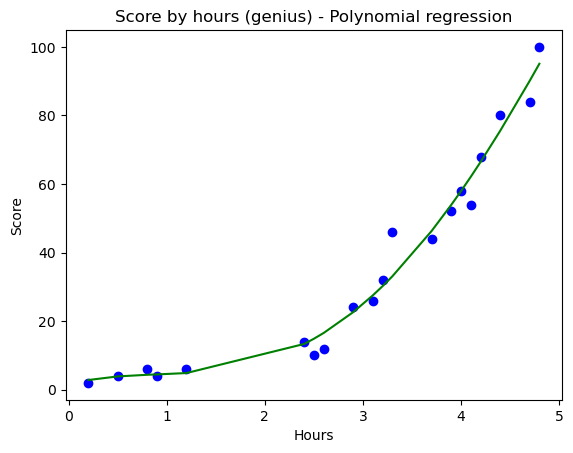

In [15]:
plt.scatter(X, y, color='blue')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='green')
plt.title("Score by hours (genius) - Polynomial regression")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

#### 좀 더 부드러운 곡선을 만들기 위한 작업

In [16]:
X_range = np.arange(min(X), max(X), 0.1)
X_range

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [17]:
X_range.shape

(46,)

In [18]:
X_range = X_range.reshape(-1, 1)
X_range.shape

(46, 1)

In [19]:
X_range[:5]

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

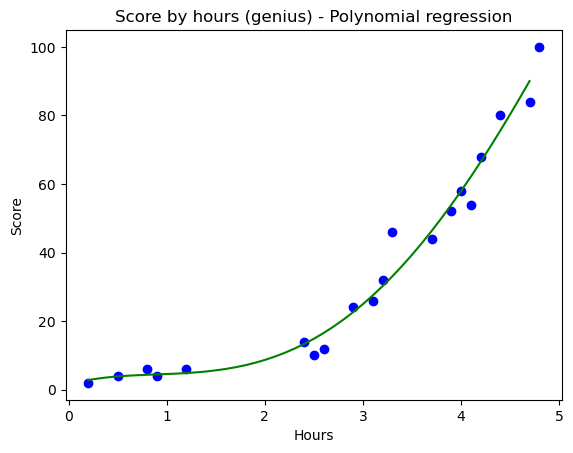

In [20]:
plt.scatter(X, y, color='blue')
plt.plot(X_range, lin_reg.predict(poly_reg.fit_transform(X_range)), color='green')
plt.title("Score by hours (genius) - Polynomial regression")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

### 공부 시간에 따른 시험 성적 예측

In [21]:
reg.predict([[2]]) # 2시간 공부했을 때 성적은? - 단순 선형 회귀

array([19.85348988])

In [22]:
lin_reg.predict(poly_reg.fit_transform([[2]])) # 2시간 공부했을 때 성적은? - 다항 선형 회귀

array([8.70559135])

In [23]:
lin_reg.score(X_poly, y)

0.9782775579000045